# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [ ]:
df = pd.read_excel("/content/sample_data/Flipkart Sales Dataset.xlsx")

**checking dataset**

In [ ]:
df.head()

,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,SubCategory,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,Onsite -Description mismatch,2
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,Product - Not fitting expectation,2
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,NaN,3
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,NaN,1
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,NaN,3


In [ ]:
df.shape

(133503, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133503 entries, 0 to 133502
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   OrderDate         133503 non-null  datetime64[ns]
 1   OrderID           133503 non-null  int64         
 2   Delivery Date     133503 non-null  datetime64[ns]
 3   CustomerID        133503 non-null  int64         
 4   Customer Age      133503 non-null  int64         
 5   Customer Gender   133503 non-null  object        
 6   Location          133503 non-null  object        
 7   Zone              133503 non-null  object        
 8   Delivery Type     133503 non-null  object        
 9   Product Category  133503 non-null  object        
 10  SubCategory       133503 non-null  object        
 11  Product           133503 non-null  object        
 12  Unit Price        133503 non-null  int64         
 13  Shipping Fee      133503 non-null  int64         
 14  Orde

In [ ]:
df.describe()

,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Unit Price,Shipping Fee,Order Quantity,Sale Price,Rating
count,133503,1.335030e+05,133503,1.335030e+05,133503.000000,133503.000000,133503.000000,133503.000000,133503.000000,133503.000000
mean,2018-07-03 08:44:06.951753984,5.087078e+06,2018-07-12 21:15:22.792746240,2.305156e+08,35.930129,99.919185,11.495607,5.336974,224.995094,2.730291
min,2015-01-01 00:00:00,5.023455e+06,2015-01-03 00:00:00,2.304591e+08,17.000000,50.000000,3.000000,1.000000,150.000000,1.000000
25%,2016-11-22 00:00:00,5.056844e+06,2016-12-03 00:00:00,2.304874e+08,28.000000,75.000000,7.000000,3.000000,187.000000,2.000000
50%,2018-10-20 00:00:00,5.090226e+06,2018-10-29 00:00:00,2.305156e+08,35.000000,100.000000,11.000000,5.000000,225.000000,3.000000
75%,2020-03-25 00:00:00,5.119800e+06,2020-04-03 00:00:00,2.305439e+08,43.000000,125.000000,16.000000,8.000000,263.000000,4.000000
max,2020-12-31 00:00:00,5.136490e+06,2021-01-20 00:00:00,2.305721e+08,87.000000,150.000000,20.000000,10.000000,300.000000,5.000000
std,NaN,3.442235e+04,NaN,3.262001e+04,11.029974,29.194562,5.188966,2.922736,43.565475,1.355919


In [ ]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

In [ ]:
df.columns

Index(['orderdate', 'orderid', 'delivery_date', 'customerid', 'customer_age',
       'customer_gender', 'location', 'zone', 'delivery_type',
       'product_category', 'subcategory', 'product', 'unit_price',
       'shipping_fee', 'order_quantity', 'sale_price', 'status', 'reason',
       'rating'],
      dtype='object')

**Checking and Removing Duplicate Records**

In [ ]:
df.duplicated().sum()

np.int64(20502)

In [ ]:
df = df.drop_duplicates()

**Handling missing values**

In [ ]:
df.isnull().sum()

,0
orderdate,0
orderid,0
delivery_date,0
customerid,0
customer_age,0
customer_gender,0
location,0
zone,0
delivery_type,0
product_category,0


**Checking for outliers**

In [ ]:
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# df['sale_price'] = np.where(
#     df['sale_price'] > upper_bound,
#     upper_bound,
#     np.where(df['sale_price'] < lower_bound, lower_bound, df['sales'])
# )

# **EDA -Exploratory Data Analysis**

In [ ]:
total_cost = (df['unit_price'] * df['order_quantity']).sum()

total_sales_million = total_cost / 1_000_000

print("Total Cost is :",f"${total_sales_million:,.2f}M")

Total Cost is : $60.23M


In [ ]:
Revenue = (df['sale_price'] * df['order_quantity']).sum()

total_sales_million = Revenue / 1_000_000

print("Revenue is :",f"${total_sales_million:,.2f}M")


Revenue is : $135.61M


In [ ]:
profit = Revenue - total_cost

profit_million = profit / 1_000_000

print("Total Profit is :",f"${profit_million:,.2f}M")

Total Profit is : $75.38M


In [ ]:
total_orders = df['orderid'].count()
print("Total Orders is :",total_orders)

total_product_sold = df['order_quantity'].sum()
print("Total Product Sold is :",total_product_sold)


Total Orders is : 113000
Total Product Sold is : 602834


# Revenue

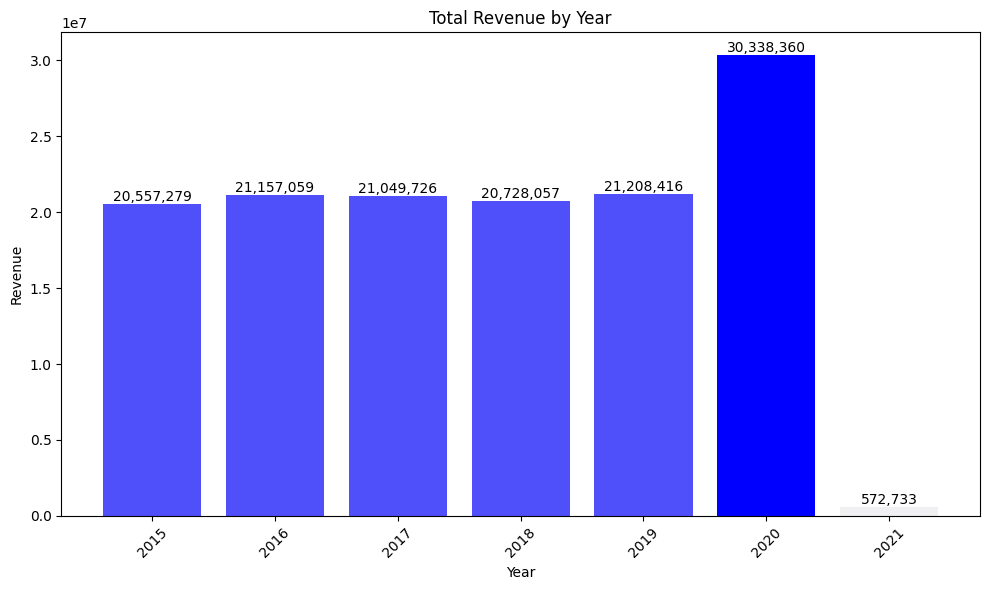

In [ ]:
revenue_by_year = df.groupby(df['delivery_date'].dt.year).apply(
    lambda x: (x['sale_price'] * x['order_quantity']).sum()
).reset_index(name='Revenue_Per_Year')

# The year column created by reset_index() might not be explicitly named 'delivery_date'.
# It often defaults to 'index' if the grouped series has no name, or takes the series' name.
# To ensure it's consistently named 'Year' for plotting, we'll rename the first column.
revenue_by_year = revenue_by_year.rename(columns={revenue_by_year.columns[0]: 'Year'})

norm = (revenue_by_year['Revenue_Per_Year'] - revenue_by_year['Revenue_Per_Year'].min()) / \
       (revenue_by_year['Revenue_Per_Year'].max() - revenue_by_year['Revenue_Per_Year'].min())

# Use a sequential color map (light → dark)
colors = sns.light_palette("blue", n_colors=len(revenue_by_year), reverse=False)
# Map colors based on normalized revenue
bar_colors = [colors[int(val * (len(colors)-1))] for val in norm]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_year['Year'], revenue_by_year['Revenue_Per_Year'], color=bar_colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2100779528.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  revenue_yearly = df.groupby('Year').apply(lambda x: (x['sale_price'] * x['order_quantity']).sum()).reset_index(name='Revenue')
/tmp/ipython-input-2100779528.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  revenue_quarterly = df.groupby(['Year', 'Quarter']).apply(lambda x: (x['sale_price'] * x['order_quantity']).sum()).re

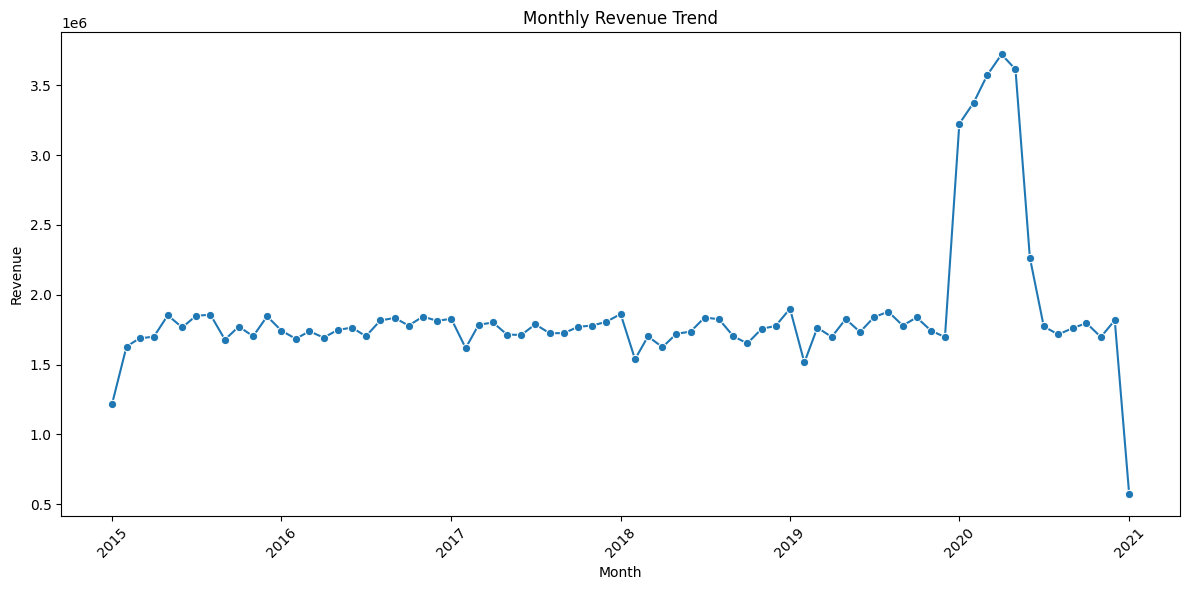

In [ ]:
# Ensure delivery_date is datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Extract Year, Month, and Quarter
df['Year'] = df['delivery_date'].dt.year
df['Month'] = df['delivery_date'].dt.month
df['Quarter'] = df['delivery_date'].dt.quarter

# Example: Yearly revenue
revenue_yearly = df.groupby('Year').apply(lambda x: (x['sale_price'] * x['order_quantity']).sum()).reset_index(name='Revenue')

# Example: Quarterly revenue
revenue_quarterly = df.groupby(['Year', 'Quarter']).apply(lambda x: (x['sale_price'] * x['order_quantity']).sum()).reset_index(name='Revenue')

# Example: Monthly revenue
revenue_monthly = df.groupby(['Year', 'Month']).apply(lambda x: (x['sale_price'] * x['order_quantity']).sum()).reset_index(name='Revenue')

# Monthly revenue trend example
plt.figure(figsize=(12,6))
sns.lineplot(x=pd.to_datetime(revenue_monthly[['Year','Month']].assign(DAY=1)),
             y='Revenue', data=revenue_monthly, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Order Details Analysis**

                                              product  order_quantity
42                 Yazole Leather Wrist Watch - Black           11501
43  voice blood Pressure Monitor Digital BP Pulse ...           11316
21                    Hemani Ultra Slim Tea - 10 Bags           11303
38  Triple Power C20 Super Bass USB Bluetooth Subw...           11292
31            Portable Blood Pressure Monitor - White           11241
33  Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...           11230
20  Heat Resistant Glass Storage Bowl - 15 Pieces ...           11214


/tmp/ipython-input-822897545.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_quantity', y='product', data=top_products, palette='Blues_r')


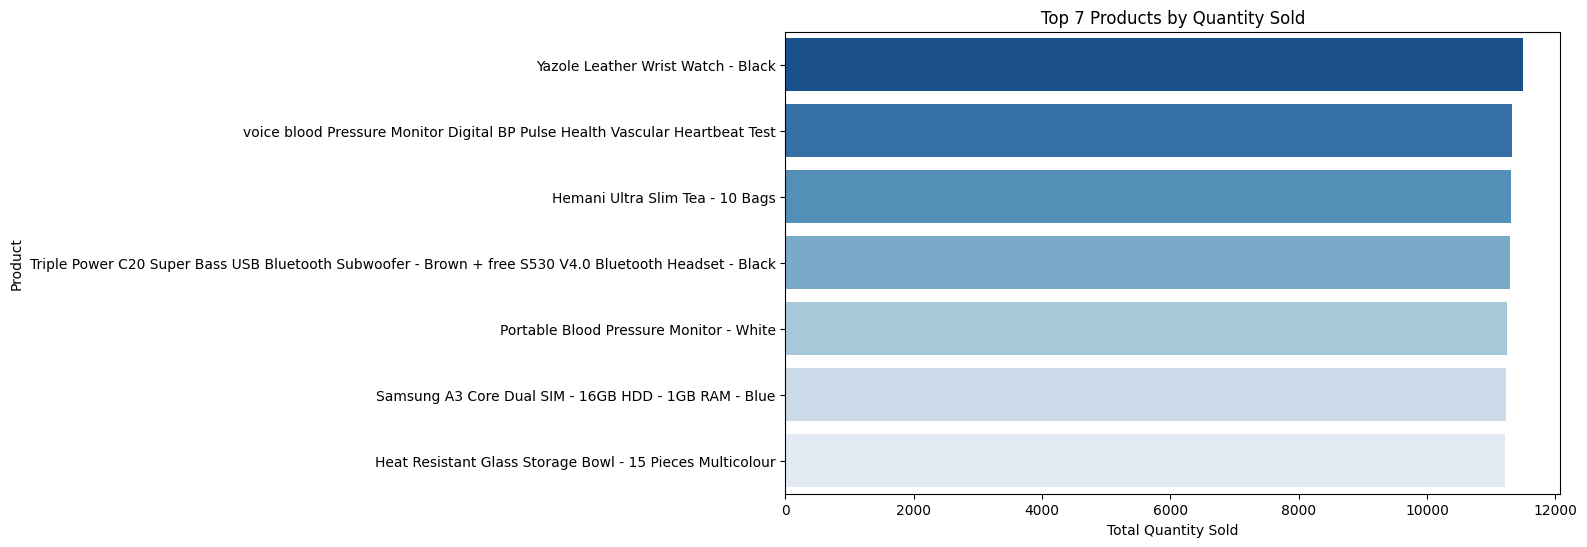

In [ ]:
completed_orders = df[df['status'] == 'Delivered']

top_products = completed_orders.groupby('product')['order_quantity'].sum().reset_index()

top_products = top_products.sort_values(by='order_quantity', ascending=False).head(7)

print(top_products)

# Plot top 7 products
plt.figure(figsize=(10,6))
sns.barplot(x='order_quantity', y='product', data=top_products, palette='Blues_r')
plt.title('Top 7 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


/tmp/ipython-input-2839187876.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='order_quantity', data=monthly_sales, palette='Blues_d')


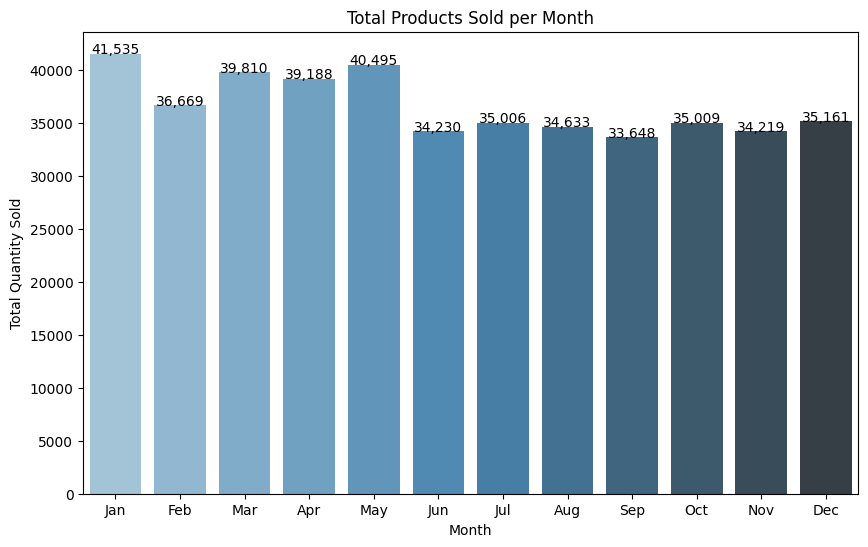

In [ ]:
# Ensure orderdate is datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])

# Extract month
df['Month'] = df['orderdate'].dt.month

# Filter delivered orders
df_delivered = df[df['status'] == 'Delivered']

# Total products sold per month
monthly_sales = df_delivered.groupby('Month')['order_quantity'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='order_quantity', data=monthly_sales, palette='Blues_d')

# Add data labels on top
for index, row in monthly_sales.iterrows():
    plt.text(row['Month']-1, row['order_quantity'] + 5, f"{int(row['order_quantity']):,}", ha='center')

plt.title('Total Products Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()



**Product Analysis**

In [ ]:
# Consider only delivered orders
df_prod = df[df['status'] == 'Delivered']

# Product performance table
product_performance = df_prod.groupby('product').agg(
    total_quantity_sold=('order_quantity', 'sum'),
    total_revenue=('sale_price', lambda x: (x * df_prod.loc[x.index, 'order_quantity']).sum()),
    avg_unit_price=('unit_price', 'mean')
).reset_index()

product_performance.head()


,product,total_quantity_sold,total_revenue,avg_unit_price
0,10.1'' Business Tablet with MT6582 Quad-Core P...,13330,3011656,100.346639
1,100%Cotton 4 Piece Short Sleeve T-Shirts - Mul...,13280,2974236,99.032821
2,6030 3.1 Bluetooth Home Theatre With Remote Co...,11382,2554298,101.038682
3,8 Cubes Plastic Wardrobe - Blue/White,12892,2886383,99.372708
4,Aichun Beauty Eight Pack Essential Oil - 30ml,10664,2419459,98.139083


/tmp/ipython-input-3594092204.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


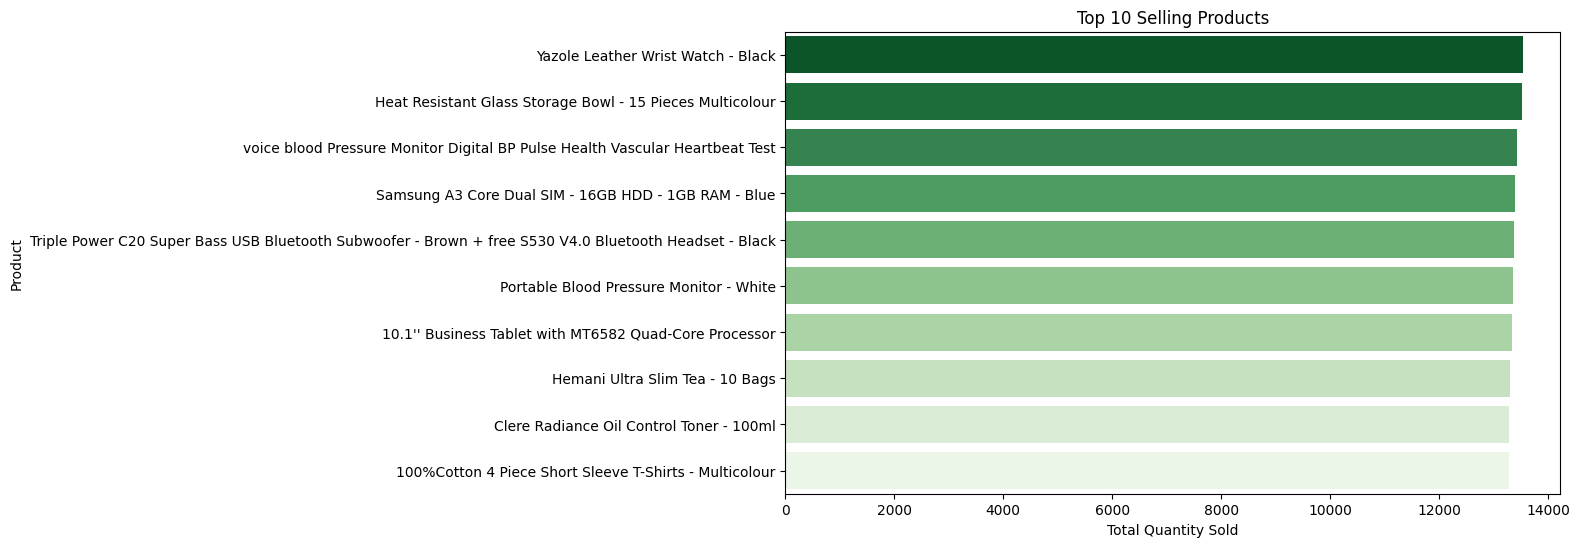

In [ ]:
top_products = product_performance.sort_values(
    by='total_quantity_sold', ascending=False
).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='total_quantity_sold',
    y='product',
    data=top_products,
    palette='Greens_r'
)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


/tmp/ipython-input-4286192045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


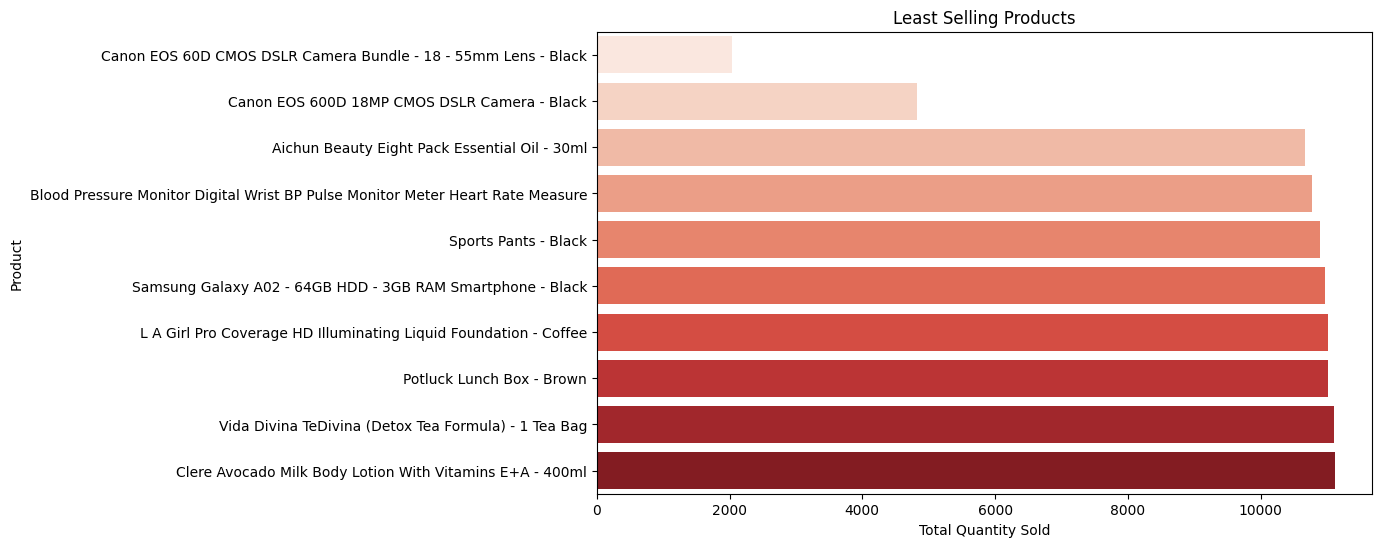

In [ ]:
least_products = product_performance.sort_values(
    by='total_quantity_sold', ascending=True
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x='total_quantity_sold',
    y='product',
    data=least_products,
    palette='Reds'
)
plt.title('Least Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


/tmp/ipython-input-89527743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


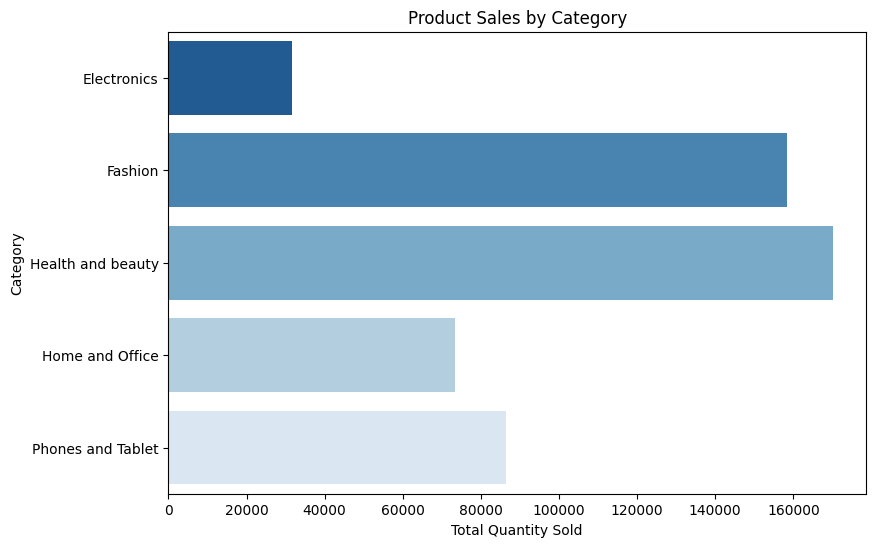

In [ ]:
category_performance = df_prod.groupby('product_category')['order_quantity'].sum().reset_index()

plt.figure(figsize=(9,6))
sns.barplot(
    x='order_quantity',
    y='product_category',
    data=category_performance,
    palette='Blues_r'
)
plt.title('Product Sales by Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.show()


/tmp/ipython-input-806328235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['price_range'] = pd.cut(df_prod['sale_price'], bins=bins, labels=labels)
/tmp/ipython-input-806328235.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = df_prod.groupby('price_range')['order_quantity'].sum().reset_index()
/tmp/ipython-input-806328235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

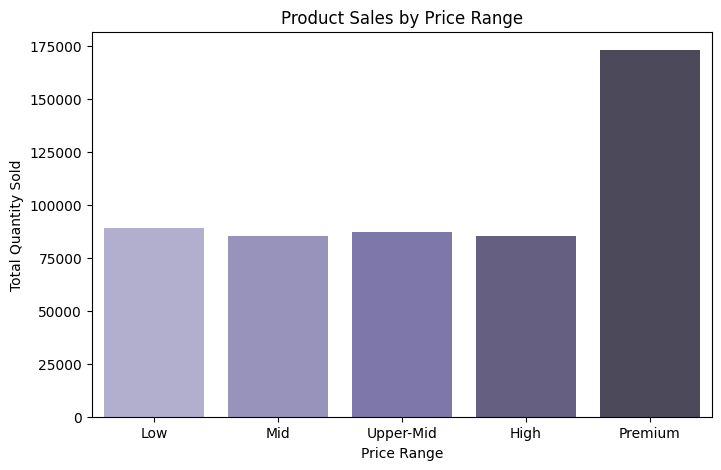

In [ ]:
# Create price ranges
bins = [0, 175, 200, 225, 250, 301] # Adjusted bins to be monotonically increasing and cover the actual sale_price range (max 300)
labels = ['Low', 'Mid', 'Upper-Mid', 'High', 'Premium']

df_prod['price_range'] = pd.cut(df_prod['sale_price'], bins=bins, labels=labels)

price_range_sales = df_prod.groupby('price_range')['order_quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='price_range',
    y='order_quantity',
    data=price_range_sales,
    palette='Purples_d'
)
plt.title('Product Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Quantity Sold')
plt.show()

**Customer Insights**

/tmp/ipython-input-2419313286.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby('age_group')['customerid'].nunique().reset_index()
/tmp/ipython-input-2419313286.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


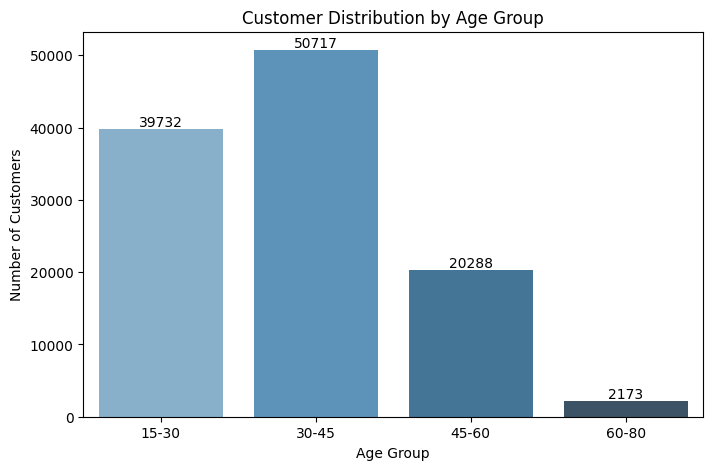

In [ ]:
bins = [15, 30, 45, 60, 80]
labels = ['15-30', '30-45', '45-60', '60-80']

df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)

age_group_counts = df.groupby('age_group')['customerid'].nunique().reset_index()
age_group_counts.rename(columns={'customerid': 'number_of_customers'}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x='age_group',
    y='number_of_customers',
    data=age_group_counts,
    palette='Blues_d'
)

# Data labels
for index, row in age_group_counts.iterrows():
    plt.text(index, row['number_of_customers'], row['number_of_customers'], ha='center', va='bottom')

plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()
